## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  32.283769  1122.255908  0.349498  10.393943  1.448105
1  87.780769   134.725648  0.223634   4.693382  0.295663
2  28.946396  1621.637538  0.713115   8.557940  1.637905
3  66.580869   548.613021  0.383442   2.168750  1.339421
4  48.208182  1708.005151  0.500576   6.759021  1.500175


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.17321 | train_mse: 2.54433 | train_mae: 1.27682 |  0:00:00s
epoch 1  | loss: 0.65625 | train_mse: 2.0616  | train_mae: 1.10733 |  0:00:00s
epoch 2  | loss: 0.80638 | train_mse: 2.27751 | train_mae: 1.10105 |  0:00:00s


epoch 3  | loss: 1.09457 | train_mse: 1.50092 | train_mae: 0.9089  |  0:00:00s
epoch 4  | loss: 0.87926 | train_mse: 1.2925  | train_mae: 0.8607  |  0:00:00s
epoch 5  | loss: 0.57175 | train_mse: 1.59024 | train_mae: 0.97658 |  0:00:00s


epoch 6  | loss: 0.52496 | train_mse: 1.95889 | train_mae: 1.05213 |  0:00:00s
epoch 7  | loss: 0.54574 | train_mse: 1.51514 | train_mae: 0.90056 |  0:00:00s


epoch 8  | loss: 0.46747 | train_mse: 1.26872 | train_mae: 0.81096 |  0:00:01s
epoch 9  | loss: 0.42057 | train_mse: 1.25145 | train_mae: 0.8173  |  0:00:01s
epoch 10 | loss: 0.33573 | train_mse: 1.6667  | train_mae: 0.93284 |  0:00:01s


epoch 11 | loss: 0.54802 | train_mse: 1.6095  | train_mae: 0.9171  |  0:00:01s
epoch 12 | loss: 0.49756 | train_mse: 1.50804 | train_mae: 0.84659 |  0:00:01s
epoch 13 | loss: 0.30279 | train_mse: 1.31399 | train_mae: 0.76912 |  0:00:01s


epoch 14 | loss: 0.43613 | train_mse: 0.80509 | train_mae: 0.62006 |  0:00:01s
epoch 15 | loss: 0.42481 | train_mse: 0.7303  | train_mae: 0.61296 |  0:00:01s
epoch 16 | loss: 0.38986 | train_mse: 0.80197 | train_mae: 0.64564 |  0:00:01s


epoch 17 | loss: 0.24266 | train_mse: 0.66002 | train_mae: 0.55268 |  0:00:01s
epoch 18 | loss: 0.32999 | train_mse: 0.47059 | train_mae: 0.49027 |  0:00:01s
epoch 19 | loss: 0.2501  | train_mse: 0.39933 | train_mae: 0.45054 |  0:00:02s


epoch 20 | loss: 0.45231 | train_mse: 0.38623 | train_mae: 0.45375 |  0:00:02s
epoch 21 | loss: 0.21956 | train_mse: 0.31709 | train_mae: 0.42221 |  0:00:02s
epoch 22 | loss: 0.52394 | train_mse: 0.23612 | train_mae: 0.38094 |  0:00:02s


epoch 23 | loss: 0.41687 | train_mse: 0.3043  | train_mae: 0.39091 |  0:00:02s
epoch 24 | loss: 0.26865 | train_mse: 0.35761 | train_mae: 0.42437 |  0:00:02s
epoch 25 | loss: 0.15963 | train_mse: 0.36324 | train_mae: 0.45046 |  0:00:02s


epoch 26 | loss: 0.19791 | train_mse: 0.40943 | train_mae: 0.49332 |  0:00:02s
epoch 27 | loss: 0.36951 | train_mse: 0.3914  | train_mae: 0.46805 |  0:00:02s
epoch 28 | loss: 0.3074  | train_mse: 0.3247  | train_mae: 0.43971 |  0:00:02s


epoch 29 | loss: 0.24287 | train_mse: 0.30417 | train_mae: 0.40272 |  0:00:02s
epoch 30 | loss: 0.20099 | train_mse: 0.28945 | train_mae: 0.37056 |  0:00:02s
epoch 31 | loss: 0.32431 | train_mse: 0.29835 | train_mae: 0.3706  |  0:00:03s


epoch 32 | loss: 0.23172 | train_mse: 0.31905 | train_mae: 0.37731 |  0:00:03s
epoch 33 | loss: 0.20966 | train_mse: 0.2141  | train_mae: 0.32066 |  0:00:03s
epoch 34 | loss: 0.17511 | train_mse: 0.16809 | train_mae: 0.30093 |  0:00:03s


epoch 35 | loss: 0.2199  | train_mse: 0.13605 | train_mae: 0.28197 |  0:00:03s
epoch 36 | loss: 0.15899 | train_mse: 0.14182 | train_mae: 0.28757 |  0:00:03s
epoch 37 | loss: 0.23888 | train_mse: 0.19288 | train_mae: 0.32425 |  0:00:03s


epoch 38 | loss: 0.18363 | train_mse: 0.19265 | train_mae: 0.31284 |  0:00:03s
epoch 39 | loss: 0.22724 | train_mse: 0.26718 | train_mae: 0.35561 |  0:00:03s
epoch 40 | loss: 0.26527 | train_mse: 0.16407 | train_mae: 0.29666 |  0:00:03s


epoch 41 | loss: 0.19902 | train_mse: 0.12033 | train_mae: 0.26959 |  0:00:03s
epoch 42 | loss: 0.38877 | train_mse: 0.19054 | train_mae: 0.30002 |  0:00:03s
epoch 43 | loss: 0.16319 | train_mse: 0.16176 | train_mae: 0.2865  |  0:00:04s


epoch 44 | loss: 0.15945 | train_mse: 0.14632 | train_mae: 0.25405 |  0:00:04s
epoch 45 | loss: 0.29889 | train_mse: 0.19691 | train_mae: 0.28771 |  0:00:04s
epoch 46 | loss: 0.192   | train_mse: 0.19181 | train_mae: 0.29171 |  0:00:04s


epoch 47 | loss: 0.16471 | train_mse: 0.1343  | train_mae: 0.24234 |  0:00:04s
epoch 48 | loss: 0.21435 | train_mse: 0.14453 | train_mae: 0.26415 |  0:00:04s


epoch 49 | loss: 0.28503 | train_mse: 0.12354 | train_mae: 0.24202 |  0:00:04s
epoch 50 | loss: 0.28245 | train_mse: 0.11172 | train_mae: 0.24994 |  0:00:04s


epoch 51 | loss: 0.10619 | train_mse: 0.10846 | train_mae: 0.2473  |  0:00:05s
epoch 52 | loss: 0.25845 | train_mse: 0.12433 | train_mae: 0.25985 |  0:00:05s


epoch 53 | loss: 0.19147 | train_mse: 0.15739 | train_mae: 0.27809 |  0:00:05s
epoch 54 | loss: 0.13461 | train_mse: 0.14134 | train_mae: 0.25315 |  0:00:05s
epoch 55 | loss: 0.2585  | train_mse: 0.13326 | train_mae: 0.26542 |  0:00:05s


epoch 56 | loss: 0.11382 | train_mse: 0.13469 | train_mae: 0.27388 |  0:00:05s
epoch 57 | loss: 0.18175 | train_mse: 0.11419 | train_mae: 0.26211 |  0:00:05s
epoch 58 | loss: 0.29858 | train_mse: 0.1285  | train_mae: 0.28052 |  0:00:05s


epoch 59 | loss: 0.23878 | train_mse: 0.11514 | train_mae: 0.265   |  0:00:05s
epoch 60 | loss: 0.15322 | train_mse: 0.12151 | train_mae: 0.26446 |  0:00:05s
epoch 61 | loss: 0.12425 | train_mse: 0.12065 | train_mae: 0.26591 |  0:00:06s


epoch 62 | loss: 0.12223 | train_mse: 0.09562 | train_mae: 0.23199 |  0:00:06s
epoch 63 | loss: 0.22709 | train_mse: 0.09205 | train_mae: 0.23228 |  0:00:06s
epoch 64 | loss: 0.2279  | train_mse: 0.0963  | train_mae: 0.2362  |  0:00:06s


epoch 65 | loss: 0.22095 | train_mse: 0.08776 | train_mae: 0.21983 |  0:00:06s
epoch 66 | loss: 0.10623 | train_mse: 0.07691 | train_mae: 0.2095  |  0:00:06s
epoch 67 | loss: 0.26101 | train_mse: 0.08027 | train_mae: 0.20937 |  0:00:06s


epoch 68 | loss: 0.12391 | train_mse: 0.09306 | train_mae: 0.21881 |  0:00:06s
epoch 69 | loss: 0.11346 | train_mse: 0.11332 | train_mae: 0.24053 |  0:00:06s
epoch 70 | loss: 0.09638 | train_mse: 0.12577 | train_mae: 0.26024 |  0:00:06s


epoch 71 | loss: 0.29282 | train_mse: 0.14554 | train_mae: 0.27559 |  0:00:06s
epoch 72 | loss: 0.13434 | train_mse: 0.14602 | train_mae: 0.27967 |  0:00:06s


epoch 73 | loss: 0.14085 | train_mse: 0.13985 | train_mae: 0.27366 |  0:00:07s
epoch 74 | loss: 0.20529 | train_mse: 0.11973 | train_mae: 0.2598  |  0:00:07s


epoch 75 | loss: 0.16427 | train_mse: 0.10152 | train_mae: 0.24014 |  0:00:07s
epoch 76 | loss: 0.19662 | train_mse: 0.09888 | train_mae: 0.23893 |  0:00:07s
epoch 77 | loss: 0.24545 | train_mse: 0.11296 | train_mae: 0.25321 |  0:00:07s


epoch 78 | loss: 0.29393 | train_mse: 0.12534 | train_mae: 0.26427 |  0:00:07s
epoch 79 | loss: 0.27467 | train_mse: 0.12275 | train_mae: 0.26834 |  0:00:07s
epoch 80 | loss: 0.19868 | train_mse: 0.14636 | train_mae: 0.27805 |  0:00:07s


epoch 81 | loss: 0.20164 | train_mse: 0.1453  | train_mae: 0.26106 |  0:00:07s
epoch 82 | loss: 0.21692 | train_mse: 0.12671 | train_mae: 0.24462 |  0:00:07s
epoch 83 | loss: 0.23116 | train_mse: 0.14544 | train_mae: 0.25496 |  0:00:08s


epoch 84 | loss: 0.18108 | train_mse: 0.205   | train_mae: 0.29931 |  0:00:08s
epoch 85 | loss: 0.13255 | train_mse: 0.1797  | train_mae: 0.27488 |  0:00:08s
epoch 86 | loss: 0.24481 | train_mse: 0.11242 | train_mae: 0.23901 |  0:00:08s


epoch 87 | loss: 0.2306  | train_mse: 0.12445 | train_mae: 0.25342 |  0:00:08s
epoch 88 | loss: 0.30603 | train_mse: 0.11293 | train_mae: 0.24753 |  0:00:08s
epoch 89 | loss: 0.19912 | train_mse: 0.09932 | train_mae: 0.22703 |  0:00:08s


epoch 90 | loss: 0.29225 | train_mse: 0.10195 | train_mae: 0.22621 |  0:00:08s
epoch 91 | loss: 0.24883 | train_mse: 0.10752 | train_mae: 0.23258 |  0:00:08s
epoch 92 | loss: 0.20483 | train_mse: 0.10698 | train_mae: 0.22709 |  0:00:08s


epoch 93 | loss: 0.09668 | train_mse: 0.09205 | train_mae: 0.22398 |  0:00:08s
epoch 94 | loss: 0.16253 | train_mse: 0.09608 | train_mae: 0.23352 |  0:00:08s
epoch 95 | loss: 0.22548 | train_mse: 0.09448 | train_mae: 0.22888 |  0:00:09s


epoch 96 | loss: 0.20148 | train_mse: 0.08712 | train_mae: 0.22591 |  0:00:09s
epoch 97 | loss: 0.17487 | train_mse: 0.10688 | train_mae: 0.23969 |  0:00:09s
epoch 98 | loss: 0.23197 | train_mse: 0.09034 | train_mae: 0.21931 |  0:00:09s


epoch 99 | loss: 0.21876 | train_mse: 0.09169 | train_mae: 0.21897 |  0:00:09s
epoch 100| loss: 0.12052 | train_mse: 0.09832 | train_mae: 0.21984 |  0:00:09s
epoch 101| loss: 0.26667 | train_mse: 0.10802 | train_mae: 0.22511 |  0:00:09s


epoch 102| loss: 0.26827 | train_mse: 0.12419 | train_mae: 0.24054 |  0:00:09s
epoch 103| loss: 0.26254 | train_mse: 0.09089 | train_mae: 0.21115 |  0:00:09s
epoch 104| loss: 0.22575 | train_mse: 0.06884 | train_mae: 0.19453 |  0:00:09s


epoch 105| loss: 0.19433 | train_mse: 0.07157 | train_mae: 0.20061 |  0:00:09s
epoch 106| loss: 0.1396  | train_mse: 0.06645 | train_mae: 0.19123 |  0:00:10s
epoch 107| loss: 0.09652 | train_mse: 0.0719  | train_mae: 0.20324 |  0:00:10s


epoch 108| loss: 0.10113 | train_mse: 0.10485 | train_mae: 0.23488 |  0:00:10s
epoch 109| loss: 0.13741 | train_mse: 0.07945 | train_mae: 0.20905 |  0:00:10s
epoch 110| loss: 0.12752 | train_mse: 0.09366 | train_mae: 0.21342 |  0:00:10s


epoch 111| loss: 0.12611 | train_mse: 0.09426 | train_mae: 0.21889 |  0:00:10s
epoch 112| loss: 0.16736 | train_mse: 0.07721 | train_mae: 0.20003 |  0:00:10s
epoch 113| loss: 0.2164  | train_mse: 0.05918 | train_mae: 0.19201 |  0:00:10s


epoch 114| loss: 0.12292 | train_mse: 0.08207 | train_mae: 0.21767 |  0:00:10s
epoch 115| loss: 0.09238 | train_mse: 0.09087 | train_mae: 0.22028 |  0:00:10s
epoch 116| loss: 0.12531 | train_mse: 0.08144 | train_mae: 0.19998 |  0:00:10s


epoch 117| loss: 0.08881 | train_mse: 0.0982  | train_mae: 0.21616 |  0:00:10s
epoch 118| loss: 0.20855 | train_mse: 0.10827 | train_mae: 0.23755 |  0:00:11s
epoch 119| loss: 0.21677 | train_mse: 0.10928 | train_mae: 0.23183 |  0:00:11s


epoch 120| loss: 0.17152 | train_mse: 0.11803 | train_mae: 0.24021 |  0:00:11s
epoch 121| loss: 0.0912  | train_mse: 0.13349 | train_mae: 0.25128 |  0:00:11s
epoch 122| loss: 0.35295 | train_mse: 0.13264 | train_mae: 0.24546 |  0:00:11s


epoch 123| loss: 0.11596 | train_mse: 0.12054 | train_mae: 0.2249  |  0:00:11s
epoch 124| loss: 0.08021 | train_mse: 0.15383 | train_mae: 0.24682 |  0:00:11s
epoch 125| loss: 0.15987 | train_mse: 0.17545 | train_mae: 0.26421 |  0:00:11s


epoch 126| loss: 0.10725 | train_mse: 0.08034 | train_mae: 0.21104 |  0:00:11s
epoch 127| loss: 0.25953 | train_mse: 0.08598 | train_mae: 0.22371 |  0:00:11s
epoch 128| loss: 0.14359 | train_mse: 0.08981 | train_mae: 0.23309 |  0:00:11s


epoch 129| loss: 0.17147 | train_mse: 0.12159 | train_mae: 0.27162 |  0:00:12s
epoch 130| loss: 0.18138 | train_mse: 0.11033 | train_mae: 0.23331 |  0:00:12s
epoch 131| loss: 0.10933 | train_mse: 0.11753 | train_mae: 0.22775 |  0:00:12s


epoch 132| loss: 0.13236 | train_mse: 0.10051 | train_mae: 0.21702 |  0:00:12s
epoch 133| loss: 0.2314  | train_mse: 0.10823 | train_mae: 0.23666 |  0:00:12s
epoch 134| loss: 0.15456 | train_mse: 0.09552 | train_mae: 0.22914 |  0:00:12s


epoch 135| loss: 0.16672 | train_mse: 0.08416 | train_mae: 0.22256 |  0:00:12s
epoch 136| loss: 0.13444 | train_mse: 0.06935 | train_mae: 0.19944 |  0:00:12s
epoch 137| loss: 0.10799 | train_mse: 0.0824  | train_mae: 0.21201 |  0:00:12s


epoch 138| loss: 0.07892 | train_mse: 0.10792 | train_mae: 0.23137 |  0:00:12s
epoch 139| loss: 0.10912 | train_mse: 0.14761 | train_mae: 0.25756 |  0:00:12s
epoch 140| loss: 0.1938  | train_mse: 0.14673 | train_mae: 0.2578  |  0:00:12s


epoch 141| loss: 0.13854 | train_mse: 0.1092  | train_mae: 0.23629 |  0:00:13s
epoch 142| loss: 0.23944 | train_mse: 0.0729  | train_mae: 0.20508 |  0:00:13s
epoch 143| loss: 0.12486 | train_mse: 0.09137 | train_mae: 0.22361 |  0:00:13s


epoch 144| loss: 0.142   | train_mse: 0.09823 | train_mae: 0.22819 |  0:00:13s
epoch 145| loss: 0.26596 | train_mse: 0.14287 | train_mae: 0.25876 |  0:00:13s
epoch 146| loss: 0.20769 | train_mse: 0.22345 | train_mae: 0.30998 |  0:00:13s


epoch 147| loss: 0.20151 | train_mse: 0.20621 | train_mae: 0.29371 |  0:00:13s
epoch 148| loss: 0.13824 | train_mse: 0.16734 | train_mae: 0.25949 |  0:00:13s


epoch 149| loss: 0.12755 | train_mse: 0.13086 | train_mae: 0.25016 |  0:00:13s
epoch 150| loss: 0.20301 | train_mse: 0.10348 | train_mae: 0.22774 |  0:00:13s


epoch 151| loss: 0.10553 | train_mse: 0.08395 | train_mae: 0.20731 |  0:00:14s
epoch 152| loss: 0.10377 | train_mse: 0.10985 | train_mae: 0.23421 |  0:00:14s
epoch 153| loss: 0.11272 | train_mse: 0.11157 | train_mae: 0.24655 |  0:00:14s


epoch 154| loss: 0.09054 | train_mse: 0.10046 | train_mae: 0.23086 |  0:00:14s
epoch 155| loss: 0.17865 | train_mse: 0.0944  | train_mae: 0.22823 |  0:00:14s
epoch 156| loss: 0.205   | train_mse: 0.08723 | train_mae: 0.22582 |  0:00:14s

Early stopping occurred at epoch 156 with best_epoch = 106 and best_train_mae = 0.19123
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

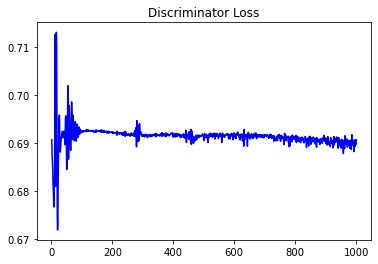

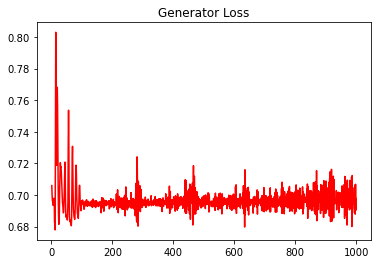

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1622000588796143


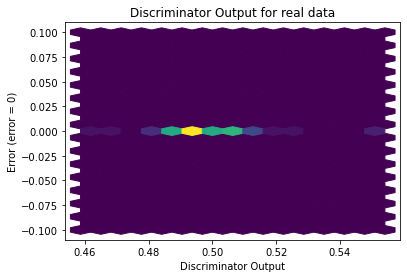

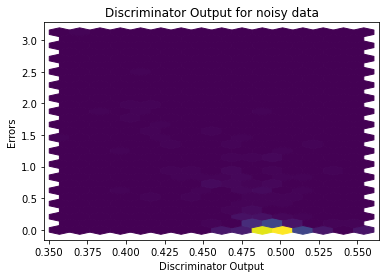

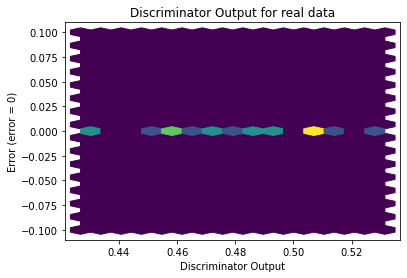

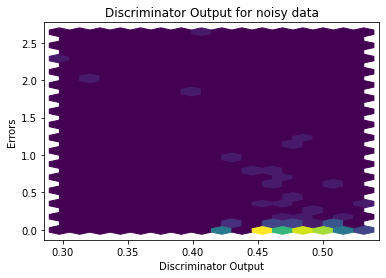

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


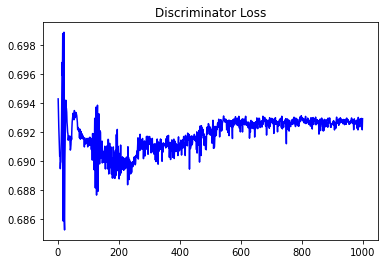

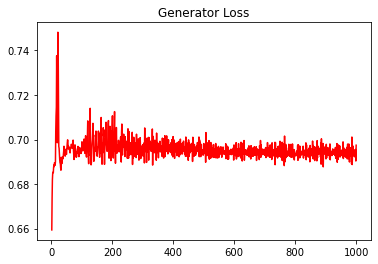

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16027904875544927


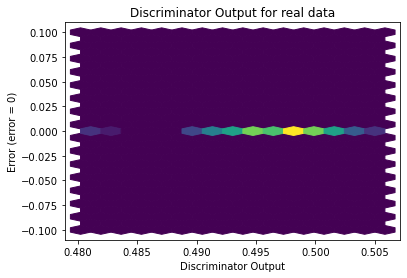

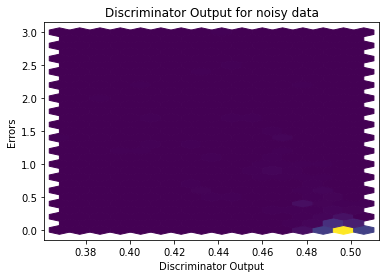

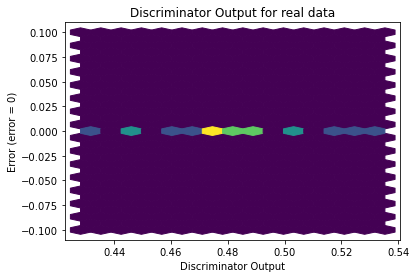

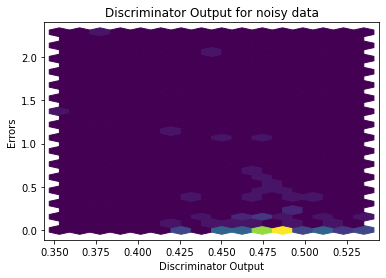

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4210]], requires_grad=True)
